1 CNN
1.11 MaxPooling

In [1]:
import tensorflow as tf

2023-11-01 09:32:19.227045: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 09:32:19.227072: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 09:32:19.228038: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 09:32:19.317437: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 09:32:20.320700: W tensorflow/compiler/

In [3]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test)= mnist.load_data()
X_train, X_test= X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size =(5,5),strides =(1,1), activation = 'relu', padding ='same', input_shape = (28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)),
    layers.Conv2D(64, (2,2), activation = 'relu', padding ='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation ='relu'),
    layers.Dense(10, activation ='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

2023-11-01 09:33:30.471388: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 09:33:30.638145: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 09:33:30.638435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
import time

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs =5, verbose =1, validation_data=(X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/5


2023-11-01 09:33:35.897051: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-01 09:33:37.355252: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-11-01 09:33:40.010617: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd15c51d810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-01 09:33:40.010658: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-11-01 09:33:40.016594: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-01 09:33:40.104866: I ./tensorflow/compiler/jit/device_compiler.h:186] Comp

1875/1875 [==============================] - 12s 4ms/step - loss: 0.1152 - accuracy: 0.9646 - val_loss: 0.0429 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0301 - val_accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0248 - val_accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0278 - val_accuracy: 0.9912
fit time :  37.93462777137756


2.6 훈련 상황은?

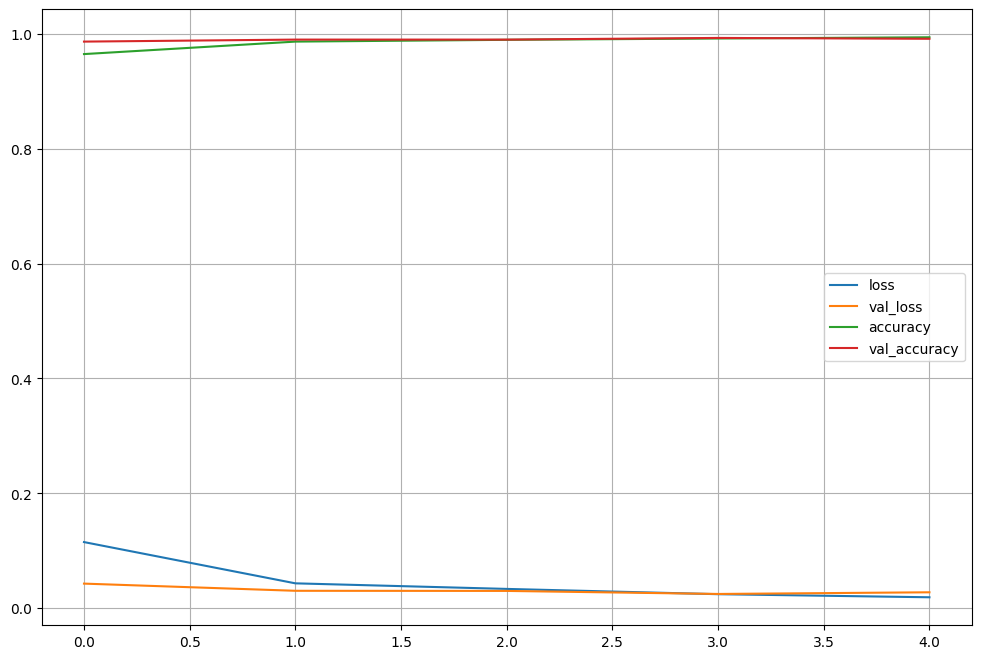

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12,8))

for each in plot_target:
    plt.plot(hist.history[each], label =each)

plt.legend()
plt.grid()
plt.show()

2.8 Test Accuracy 99%

In [10]:
score = model.evaluate(X_test, y_test)
print('Test loss :' ,score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9912
Test loss : 0.02776176668703556
Test accuracy : 0.9911999702453613
